In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
codec = 'x265'
hardware_data = pd.read_csv(f'../metrics/quality_energy_hardware_{codec}.csv')
software_data = pd.read_excel(f'../metrics/quality_energy_software_{codec}.xlsx')

In [9]:
selected_columns = ['video_name', 'vid', 'resolution', 'bitrate_encoded (kb/s)', 'PSNR', 'VMAF', 'QP', 'target_encode_energy', 'decode_energy']
hardware_data = hardware_data.loc[:, selected_columns]
hardware_data.head(8)

,video_name,vid,resolution,bitrate_encoded (kb/s),PSNR,VMAF,QP,target_encode_energy,decode_energy
0,Sports_2160P-1b70,Sports_2160P-1b70,2160,159628,49.463997,99.066262,10,32163.603573,1776.831074
1,Sports_2160P-1b70,Sports_2160P-1b70,2160,44789,43.013028,96.638991,20,18221.151505,953.408349
2,Sports_2160P-1b70,Sports_2160P-1b70,2160,4700,39.060926,87.742202,30,9685.419266,324.841353
3,Sports_2160P-1b70,Sports_2160P-1b70,2160,912,34.817706,59.543068,40,7256.542938,415.676026
4,Sports_2160P-1b70,Sports_2160P-1b70,2160,270,29.513733,21.796449,50,6706.360227,176.169433
5,Sports_2160P-1b70,Sports_2160P-1b70_downsample_1080p,1080,61068,41.275148,95.115125,10,8749.527821,828.169349
6,Sports_2160P-1b70,Sports_2160P-1b70_downsample_1080p,1080,8860,39.216904,89.032816,20,3531.625268,343.086919
7,Sports_2160P-1b70,Sports_2160P-1b70_downsample_1080p,1080,1451,36.549505,72.348992,30,2085.173318,158.103753


In [10]:
software_data.head(8)

,video_name,resolution,bitrate_encoded (kb/s),PSNR,QP,target_encode_energy,decode_energy
0,Gaming_2160P-2dc4,2160,132336.134,50.64,10,18419.601526,1287.838769
1,Gaming_2160P-2dc4,2160,28076.790,45.11,20,10994.842859,913.681104
2,Gaming_2160P-2dc4,2160,5390.882,40.32,30,6942.587781,750.739954
3,Gaming_2160P-2dc4,2160,1160.781,35.98,40,4940.599793,692.535694
4,Gaming_2160P-2dc4,2160,435.092,32.45,50,4143.708215,680.621509
5,Gaming_2160P-2dc4,1080,33640.509,41.47,10,4901.610193,293.617090
6,Gaming_2160P-2dc4,1080,7576.604,39.99,20,2818.124719,172.544800
7,Gaming_2160P-2dc4,1080,1628.299,37.28,30,1728.818408,122.724268


In [11]:
merged_data = pd.merge(hardware_data, software_data, on=['video_name', 'resolution', 'QP'], how='inner')
compare_columns = ['video_name', 'resolution', 'QP', 'target_encode_energy_x', 'decode_energy_x', 'target_encode_energy_y', 'decode_energy_y']
compare_data = merged_data[compare_columns]
compare_data.columns = ['video_name', 'resolution', 'QP', 'target_encode_energy_hardware', 'decode_energy_hardware', 'target_encode_energy_software', 'decode_energy_software']
compare_data.head(8)

,video_name,resolution,QP,target_encode_energy_hardware,decode_energy_hardware,target_encode_energy_software,decode_energy_software
0,Sports_2160P-1b70,2160,10,32163.603573,1776.831074,18255.957507,959.846313
1,Sports_2160P-1b70,2160,20,18221.151505,953.408349,9936.096399,556.458386
2,Sports_2160P-1b70,2160,30,9685.419266,324.841353,4059.017700,272.401709
3,Sports_2160P-1b70,2160,40,7256.542938,415.676026,2759.079724,225.573706
4,Sports_2160P-1b70,2160,50,6706.360227,176.169433,2214.273804,207.430811
5,Sports_2160P-1b70,1080,10,8749.527821,828.169349,5166.567737,339.067212
6,Sports_2160P-1b70,1080,20,3531.625268,343.086919,1773.190369,115.429090
7,Sports_2160P-1b70,1080,30,2085.173318,158.103753,932.688379,66.830969


target_encode_energy_hardware: [32163.60357294 18221.15150516  9685.4192661   7256.54293778
  6706.36022741]
target_encode_energy_software: [18255.9575074  9936.0963988  4059.0177     2759.079724   2214.2738036]
target_encode_energy_hardware: [8749.52782064 3531.62526798 2085.17331781 1720.22732712 1590.0726828 ]
target_encode_energy_software: [5166.5677368 1773.1903686  932.688379   675.1371096  561.753589 ]
target_encode_energy_hardware: [4206.8063398  1963.15337246 1138.24506502  824.66975432  783.75791388]
target_encode_energy_software: [2058.9076174  758.348633   436.0691772  302.4352906  243.6360594]
decode_energy_hardware: [1776.83107412  953.40834913  324.84135333  415.67602613  176.16943333]
decode_energy_software: [959.8463134 556.458386  272.4017092 225.5737062 207.4308106]
decode_energy_hardware: [828.1693488  343.0869195  158.10375256 123.69765693  87.95023871]
decode_energy_software: [339.0672118 115.4290896  66.8309692  59.0805784  51.681299 ]
decode_energy_hardware: [53

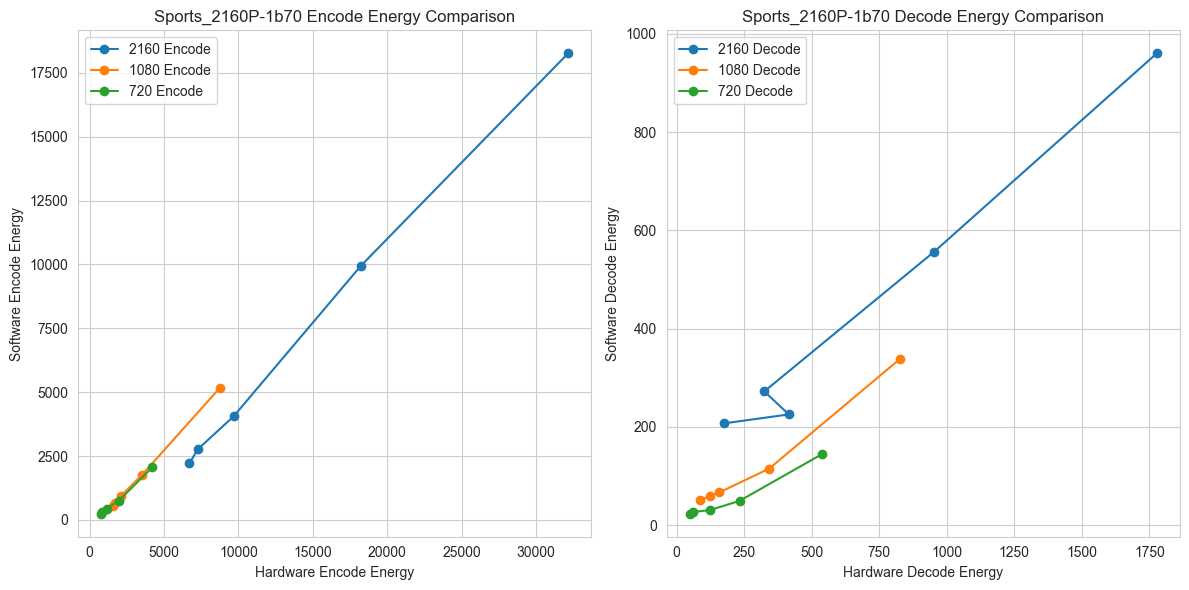

target_encode_energy_hardware: [24698.5678923  18427.98719935 11248.51049504  6242.55120489
  3960.43993933]
target_encode_energy_software: [14374.4963134 10530.8392942  6348.851721   3279.44397    1596.8680542]
target_encode_energy_hardware: [6828.4610985  4998.92011346 3133.18082166 1765.86389756 1003.23021402]
target_encode_energy_software: [4128.5615966 2975.4062134 1740.2035522  872.644397   384.6434936]
target_encode_energy_hardware: [3638.74683343 2594.96090686 1647.71097753  913.60430498  536.3207471 ]
target_encode_energy_software: [1960.9422486 1356.3926758  829.8135132  408.6981078  165.1493774]
decode_energy_hardware: [1551.31124464  852.74411706  425.72888295  135.98645      70.573125  ]
decode_energy_software: [846.0926026 527.0956178 281.7379762 179.6906616 136.7659056]
decode_energy_hardware: [576.30792086 337.18695403 169.01266458 116.91298746  52.77904928]
decode_energy_software: [268.1624998 149.0481324  76.6483274  49.9353516  34.7069214]
decode_energy_hardware: [32

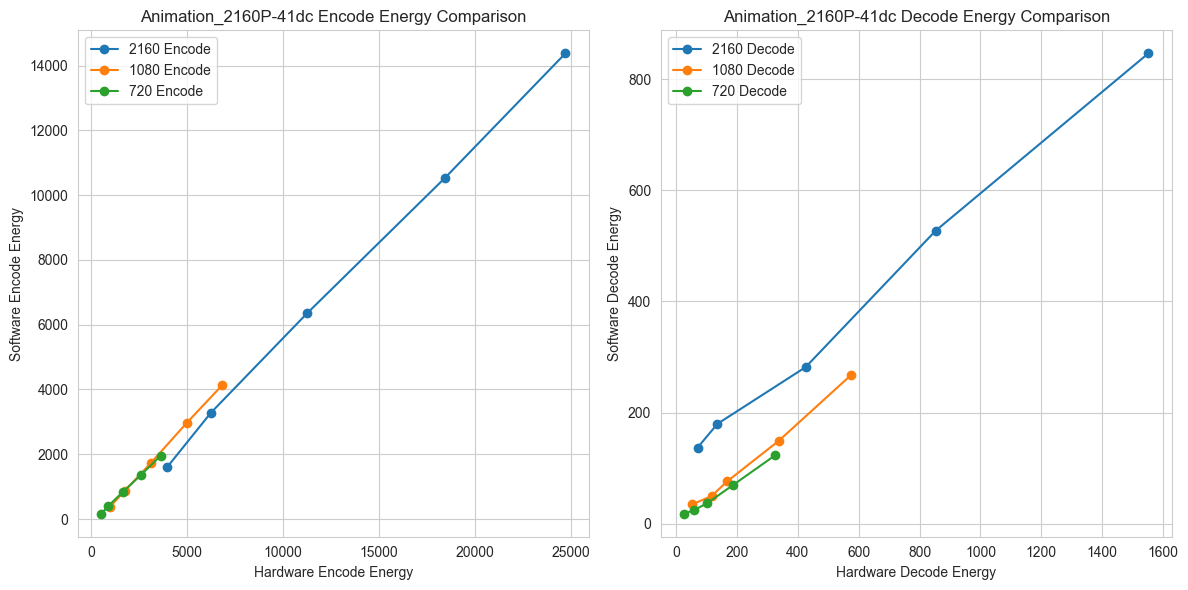

target_encode_energy_hardware: [31694.46292498 22543.94212564 12245.43215663  7529.43978815
  5695.429935  ]
target_encode_energy_software: [18392.8175538 12554.5876464  6457.5613894  3315.5021852  2142.1481688]
target_encode_energy_hardware: [8705.7812998  5281.5578125  2983.06899827 1872.16729514 1506.91217986]
target_encode_energy_software: [5281.1834352 3119.6089844 1575.41698    806.4046142  534.2407836]
target_encode_energy_hardware: [4690.00837059 2523.86050338 1349.05918846  938.31035719  751.80942705]
target_encode_energy_software: [2497.004602  1214.6578368  569.0164674  328.555908   238.5196412]
decode_energy_hardware: [1451.80240333  723.16442353  355.921566    244.2552983    68.284995  ]
decode_energy_software: [788.4118286 453.278015  259.96958   185.2651366 175.3835326]
decode_energy_hardware: [571.45528328 227.25641973 118.41500461  83.13165384  56.47727   ]
decode_energy_software: [252.8407102 104.7628906  64.6907594  47.6823976  44.269922 ]
decode_energy_hardware: [34

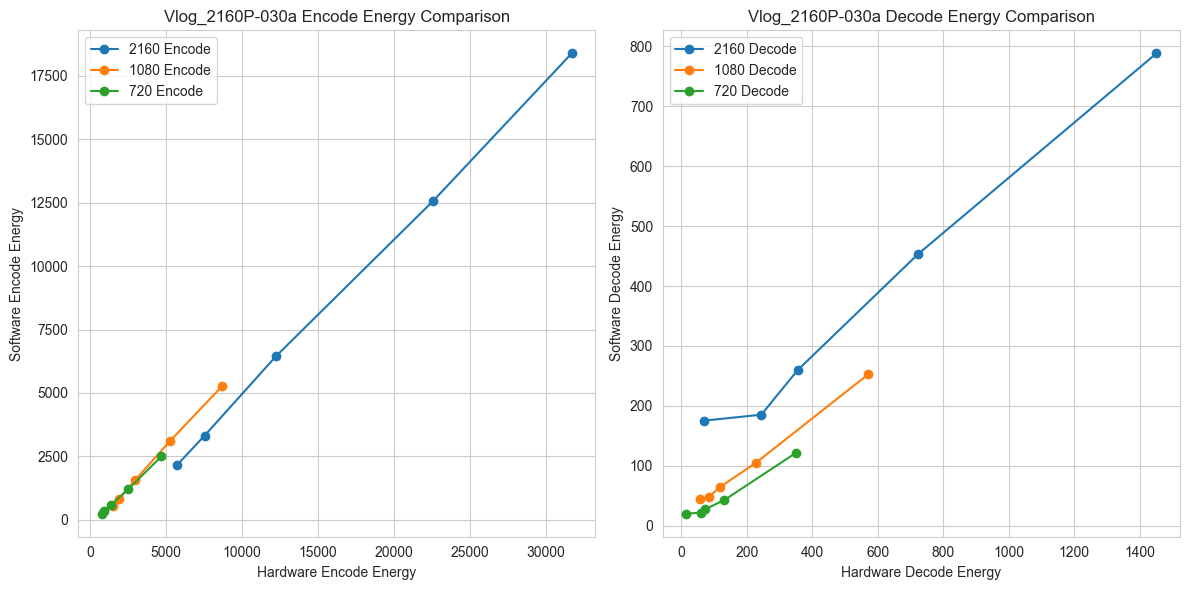

target_encode_energy_hardware: [21743.29003305 16445.6178246  11732.55252041  8638.17386488
  6782.14022781]
target_encode_energy_software: [12483.6272338  9004.5010986  6280.9047486  4179.881677   2664.6998168]
target_encode_energy_hardware: [6144.45000278 4179.30592025 2985.10158921 2176.53409672 1778.21270272]
target_encode_energy_software: [3634.1034182 2349.3212524 1549.4439818 1025.960986   658.8353636]
target_encode_energy_hardware: [3439.24074214 2448.87269779 1680.41043615 1142.87434681  840.72865943]
target_encode_energy_software: [1700.593884  1086.166101   715.5289796  482.169336   297.5879882]
decode_energy_hardware: [939.66097458 572.39514357 330.60605625 319.70333167 212.8922105 ]
decode_energy_software: [525.1374146 338.7496338 243.994165  193.9614746 167.9139648]
decode_energy_hardware: [524.93053891 292.78246015 184.99649835 123.63778497  82.35252656]
decode_energy_software: [181.533557  105.611487   69.072888   51.921643   43.8082886]
decode_energy_hardware: [344.192

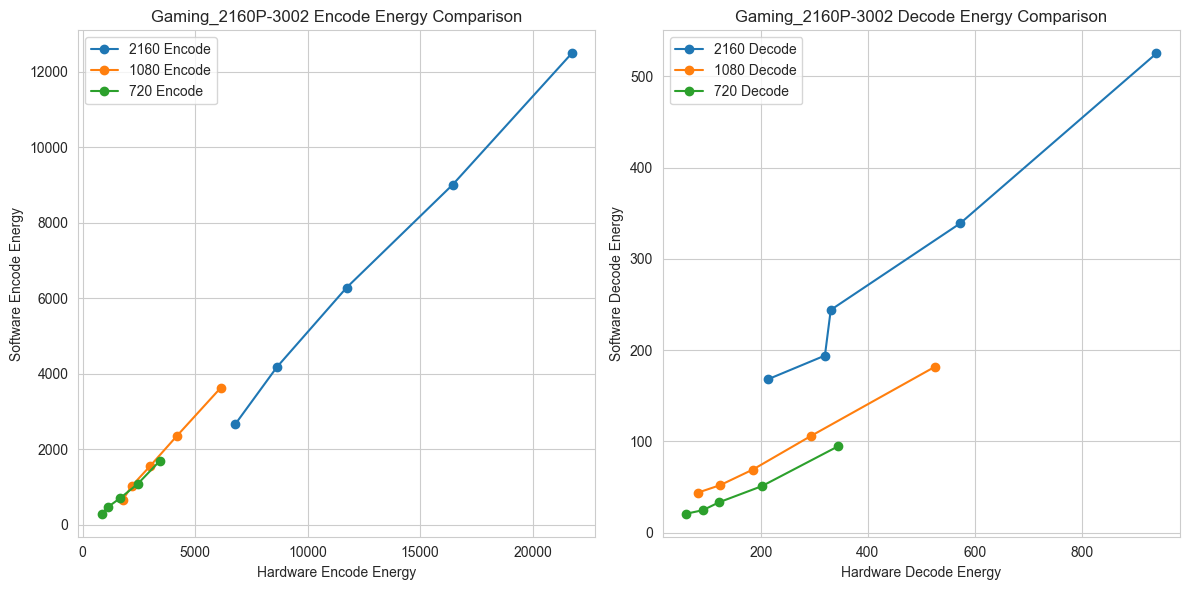

target_encode_energy_hardware: [45406.9375731  27037.82494886 18210.75575178 13801.06905797
 11954.51324389]
target_encode_energy_software: [24769.0799926 13685.8512206  8537.6302368  5717.3487914  4434.0354002]
target_encode_energy_hardware: [10750.19826732  6309.02473316  4404.74302725  3425.33504717
  3109.45663384]
target_encode_energy_software: [6242.6741334 3479.463562  2099.9654908 1417.7306032 1105.1086182]
target_encode_energy_hardware: [5641.34138408 3461.41591818 2407.68001588 1868.48496534 1669.83866931]
target_encode_energy_software: [2823.631543  1622.2279052  983.0108032  644.3791504  495.8122558]
decode_energy_hardware: [1527.45311931  946.59847391  549.01136818  435.9144825   430.80550125]
decode_energy_software: [1249.7883788  951.2909548  758.765271   733.1085206  722.4474608]
decode_energy_hardware: [754.48950131 391.76163757 249.37643624 169.9698484  134.9966145 ]
decode_energy_software: [291.7552856 162.1029784 120.238684  109.2478882 101.15177  ]
decode_energy_ha

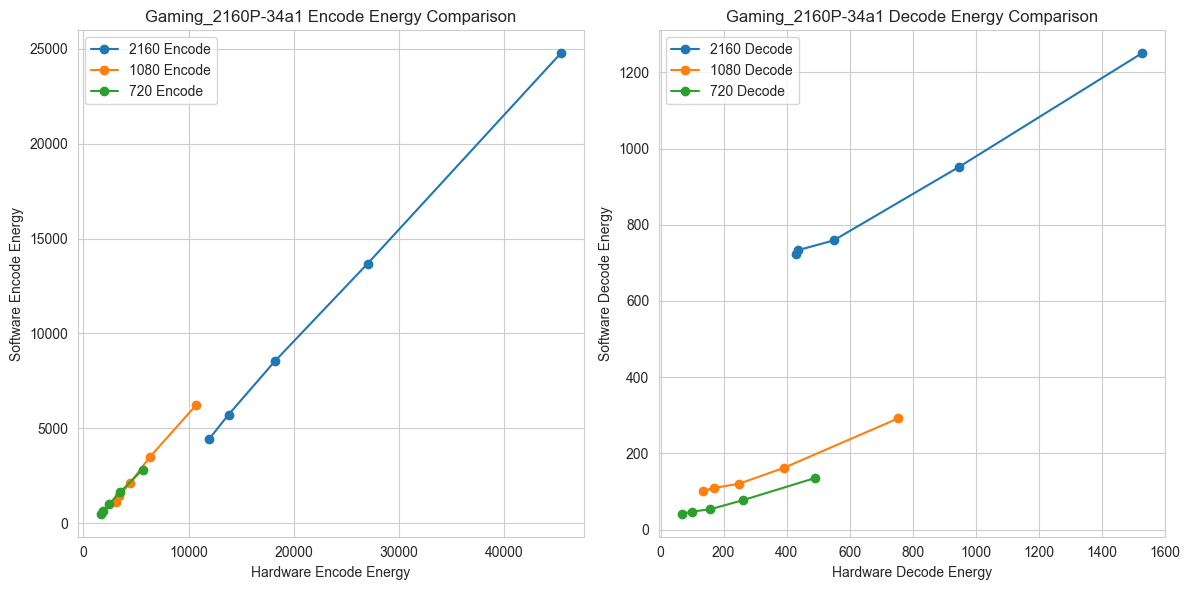

target_encode_energy_hardware: [18989.6353697  12819.77495019  8987.21458974  6929.95419057
  5837.39365309]
target_encode_energy_software: [10688.356555   6904.4741942  4399.4460326  3061.6507934  2233.3344236]
target_encode_energy_hardware: [5558.61375192 3463.07852527 2370.33790987 1882.90755931 1674.78183936]
target_encode_energy_software: [3125.0685302 1735.5345702 1097.7291014  774.727063   568.4492064]
target_encode_energy_hardware: [3347.63721763 2070.50740778 1306.03762861  939.80130865  803.315019  ]
target_encode_energy_software: [1496.7276612  810.882617   509.7274904  355.0976928  260.8220336]
decode_energy_hardware: [1125.92365586  611.54121882  343.83406875  250.9840125   167.32547   ]
decode_energy_software: [627.0151856 389.0131958 270.2211672 226.7487672 208.235437 ]
decode_energy_hardware: [572.9273331  320.40021743 195.83857486 108.67234093  83.08702515]
decode_energy_software: [201.5476808 115.6574096  73.106958   58.4592894  52.7643678]
decode_energy_hardware: [38

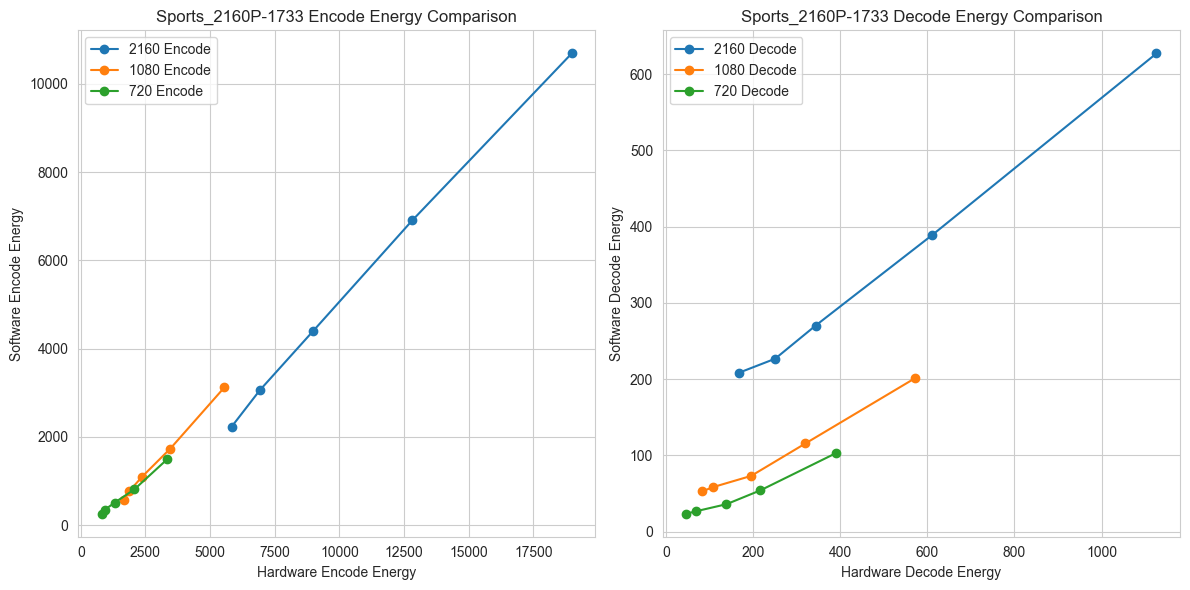

target_encode_energy_hardware: [22651.87389845 16510.54568233 11328.89616606  8628.94222628
  6800.52353079]
target_encode_energy_software: [12680.4993164  8811.6146484  5801.7456054  3638.2216308  2488.7491944]
target_encode_energy_hardware: [6413.62216538 4155.58930438 2740.79928031 2075.61624876 1768.72030774]
target_encode_energy_software: [3712.904834  2241.3987548 1371.0205444  870.8490722  620.9864016]
target_encode_energy_hardware: [3780.92710923 2353.87226812 1494.7378773  1073.2704315   900.46770744]
target_encode_energy_software: [1798.9312258 1003.9645628  602.3489384  384.9255004  299.205701 ]
decode_energy_hardware: [1244.21901303  739.18566474  358.96965857  225.157919    241.91155   ]
decode_energy_software: [673.6376708 425.0160278 268.6177734 213.8743286 196.071277 ]
decode_energy_hardware: [649.23268944 344.23624814 165.77635937 107.22103441  75.99943024]
decode_energy_software: [219.617517  116.1966432  70.8166014  56.7535036  51.2418212]
decode_energy_hardware: [42

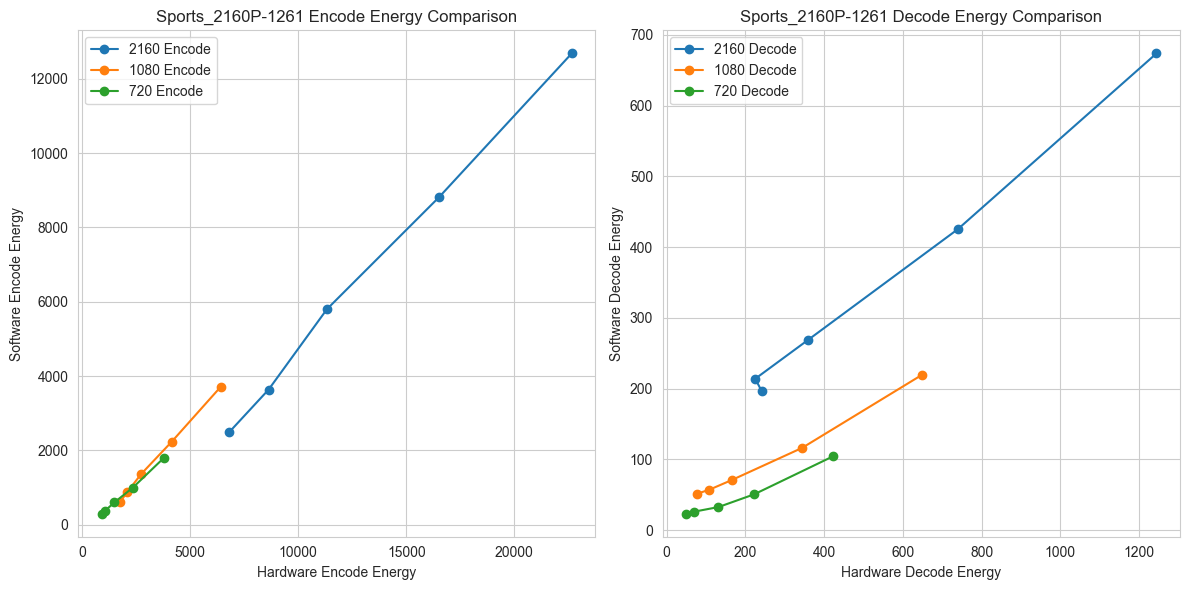

target_encode_energy_hardware: [33752.49489599 21598.82185829 15486.98707573 12703.16368172
 11521.96069347]
target_encode_energy_software: [18419.601526  10994.8428588  6942.587781   4940.5997928  4143.7082152]
target_encode_energy_hardware: [  11.3808325  5571.43906178 3906.37319486 3289.91671378 3198.02061458]
target_encode_energy_software: [4901.6101928 2818.1247192 1728.8184084 1241.0002442 1070.1980714]
target_encode_energy_hardware: [5046.87583432 3159.07039554 2077.36193203 1791.20188452 1685.15781062]
target_encode_energy_software: [2238.1983888 1285.151965   785.8546264  556.6371582  469.4916746]
decode_energy_hardware: [2001.85226127  997.44094348  582.26587227  453.65451722  382.12646667]
decode_energy_software: [1287.8387694  913.6811038  750.7399538  692.5356936  680.6215086]
decode_energy_hardware: [842.37428933 448.80016022 270.73883329 185.57739719 145.273662  ]
decode_energy_software: [293.6170896 172.5447996 122.7242676 106.8111694  98.7567626]
decode_energy_hardware

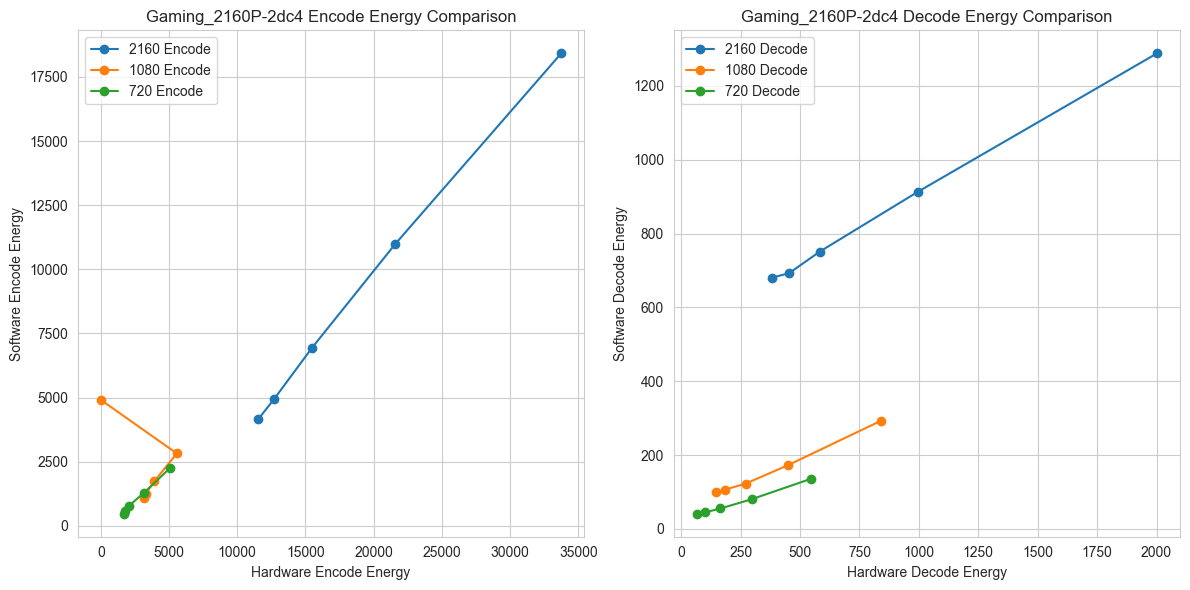

target_encode_energy_hardware: [10439.97298749  7908.21678516  6098.04097318  5575.17243089
  4909.5083706 ]
target_encode_energy_software: [5426.8519776 3841.0860474 2691.721692  2088.699841  1746.5642336]
target_encode_energy_hardware: [2779.73128983 2123.7308726  1677.17627453 1453.20070308 1360.08555983]
target_encode_energy_software: [1411.284619   955.587561   682.125647   535.7425414  454.8361574]
target_encode_energy_hardware: [1594.72810713 1174.59342176  881.18527379  725.38850933  680.14824417]
target_encode_energy_software: [650.090808  446.59812   316.609192  245.4757692 208.8121826]
decode_energy_hardware: [684.75848108 445.94151438 244.405359   282.608635   273.09794625]
decode_energy_software: [381.6099978 270.6628416 213.7243532 203.6984984 189.83479  ]
decode_energy_hardware: [277.21961474 169.90618933 103.60082378  89.63707953  65.41399371]
decode_energy_software: [109.2894898  73.731897   55.9859012  50.2913696  47.4724486]
decode_energy_hardware: [205.9484338  134.

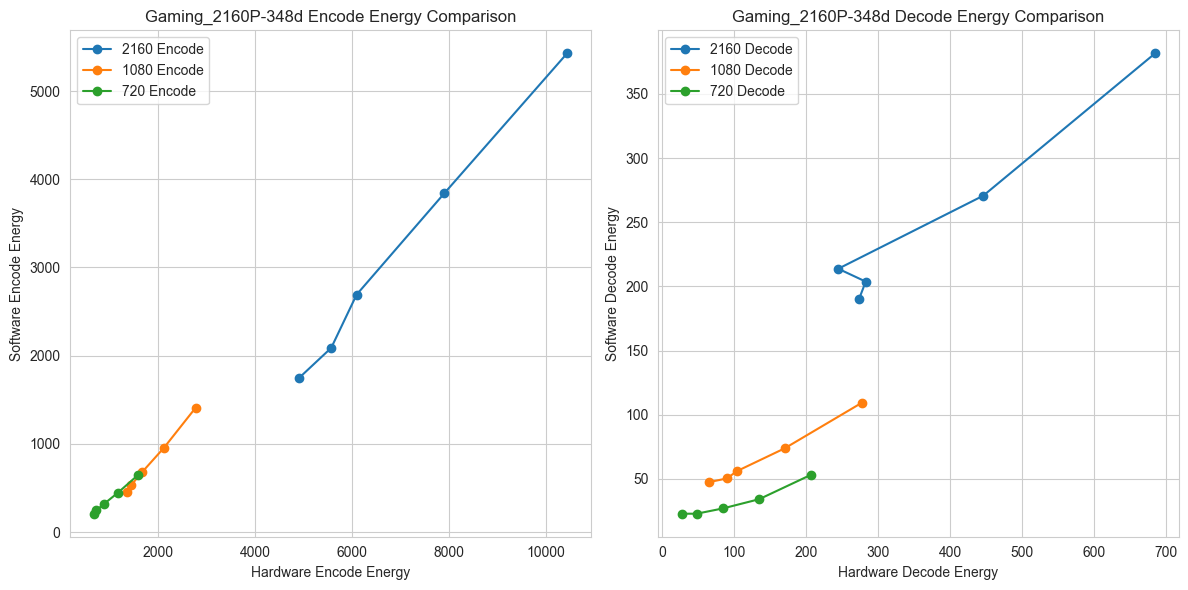

target_encode_energy_hardware: [29949.15202724 20664.28326247 12380.87825235  7942.27932239
  6467.03523553]
target_encode_energy_software: [15166.2187624  9875.5072754  5213.8332884  2871.7453124  2002.4374146]
target_encode_energy_hardware: [7827.36047697 5014.08375533 2940.7931428  1952.83821896 1770.67368798]
target_encode_energy_software: [4213.6387818 2432.2309448 1196.9884886  678.795874   479.4153198]
target_encode_energy_hardware: [4118.9390292  2662.63310404 1517.10688052  931.85827616  845.86023707]
target_encode_energy_software: [1921.1511354 1079.0732178  539.8730468  306.7795532  217.216577 ]
decode_energy_hardware: [1577.60354833  987.90304333  589.2649      376.7960875   259.61264   ]
decode_energy_software: [798.4759644 522.0186522 305.5199952 219.0206298 184.4875002]
decode_energy_hardware: [908.93601934 590.50043937 292.36668105 150.77421529 106.19933968]
decode_energy_software: [295.5890014 163.5381836  81.969519   55.7756592  49.4102294]
decode_energy_hardware: [56

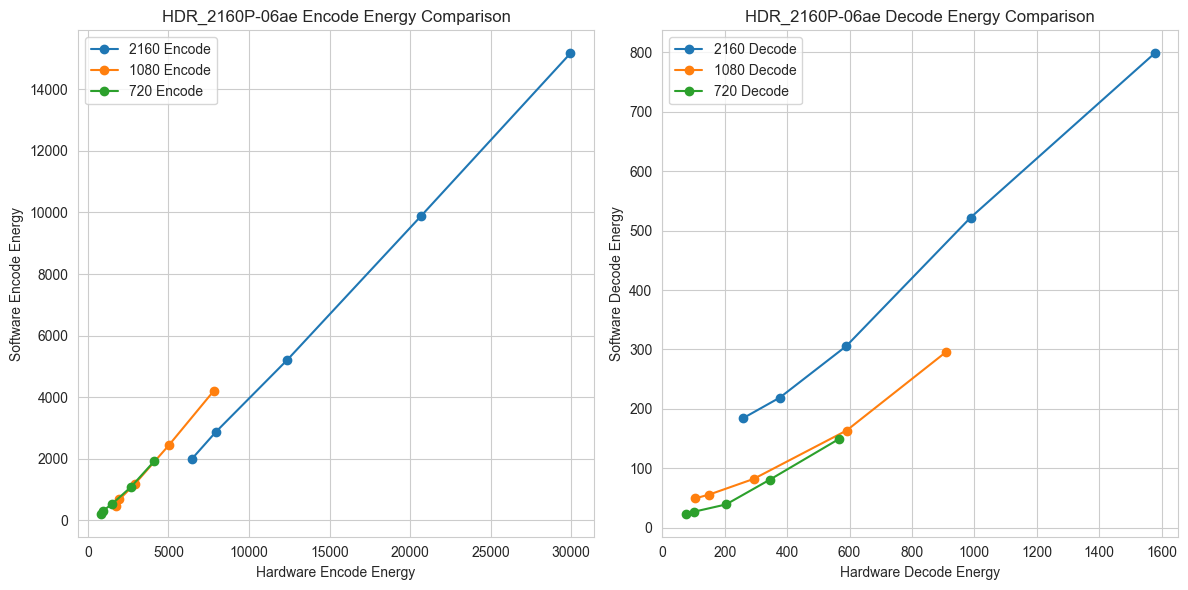

target_encode_energy_hardware: [34249.46376713 24855.50375575 16831.65162638 10824.11162722
  7112.66894526]
target_encode_energy_software: [19607.2595948 14097.1167726  8780.8912842  4552.3333498  2375.6456666]
target_encode_energy_hardware: [9804.10501865 7118.62232263 4242.30354218 2071.89344683 1825.17059647]
target_encode_energy_software: [5801.2144408 4235.073999  2255.1882326  866.0400758  587.7494994]
target_encode_energy_hardware: [5483.06402938 4082.55712507 2371.39499014  995.18921393  957.49438073]
target_encode_energy_software: [2907.3558226 1973.4885376  972.5220214  369.8388306  263.136316 ]
decode_energy_hardware: [2176.54694388 1278.07584333  682.16117647  353.327975     41.38211   ]
decode_energy_software: [1167.5416872  745.9231324  448.696765   286.4143554  243.5090942]
decode_energy_hardware: [1029.0970123   635.10474873  328.90030681  141.01423826   86.1127001 ]
decode_energy_software: [443.1496218 248.8361328 124.0756712  69.0057252  57.9048704]
decode_energy_har

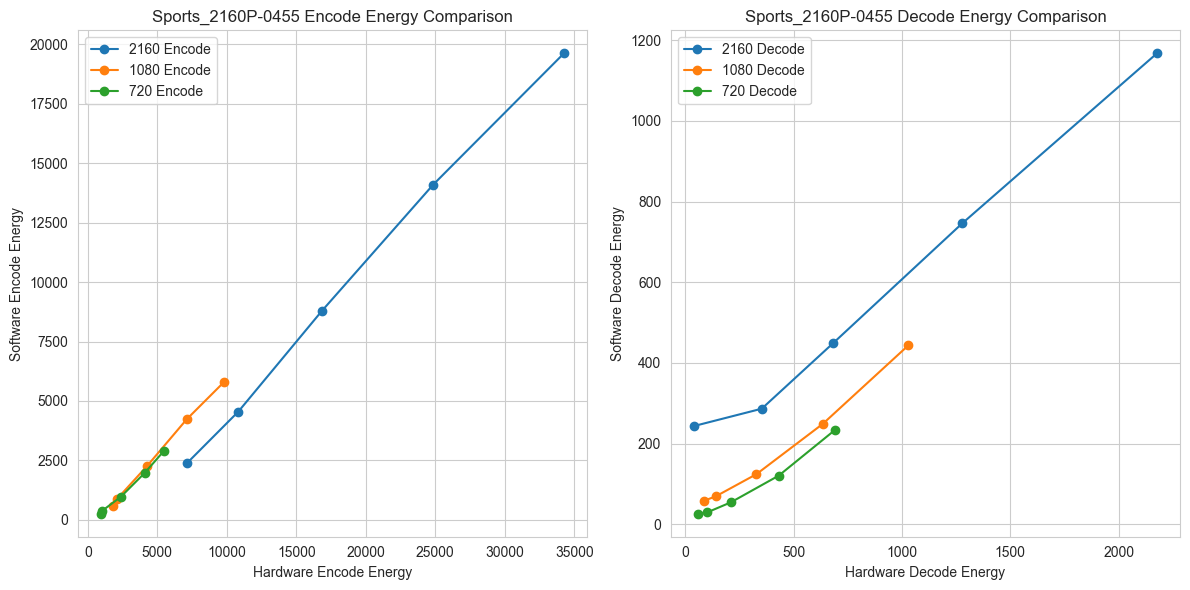

target_encode_energy_hardware: [40639.69813936 27344.94547187 16196.72479417 12012.74256429
 10926.55794425]
target_encode_energy_software: [21419.642981  14082.8673096  7924.9160278  4899.9878052  3889.6899292]
target_encode_energy_hardware: [11379.87255974  6470.91423762  3774.99747819  2939.23986496
  2701.01343393]
target_encode_energy_software: [6092.5648194 3265.2086426 1760.3715942 1172.5744508  997.46499  ]
target_encode_energy_hardware: [6129.79296287 3511.67917133 2064.33723173 1521.09018906 1516.78449717]
target_encode_energy_software: [2727.8615724 1402.1025754  783.5451538  523.8751466  431.2920654]
decode_energy_hardware: [3013.83107653 1970.47788127 1034.463284    539.55180556  415.247315  ]
decode_energy_software: [1766.5552368 1236.8233032  850.6606444  753.7267332  671.625525 ]
decode_energy_hardware: [1410.35785161  800.91610765  374.89402842  193.07965123  121.7965918 ]
decode_energy_software: [425.9720826 218.1301514 131.4309694 108.2107544  96.0309814]
decode_ener

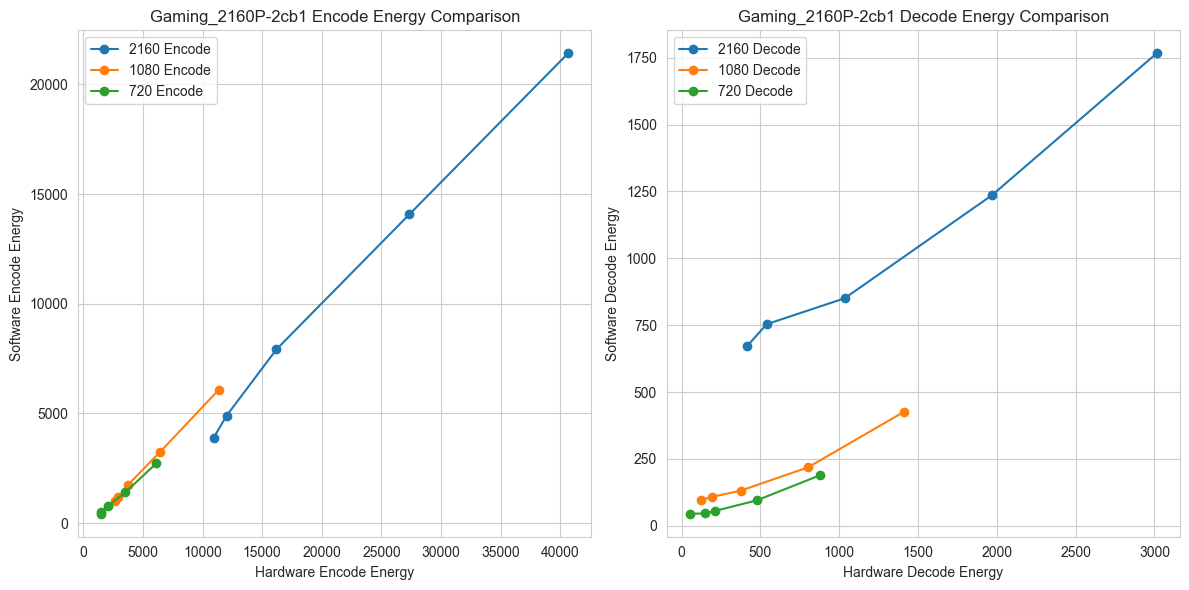

target_encode_energy_hardware: [23557.86448589 15125.06999709  8224.62599162  5980.37518447
  5598.27739452]
target_encode_energy_software: [13288.101526   8029.545398   4037.3137696  2395.4860964  1889.9225098]
target_encode_energy_hardware: [6148.74755641 3731.60121282 2085.73045568 1625.64506345 1469.02874245]
target_encode_energy_software: [3555.9728394 2011.0450926  955.6720216  633.6926148  480.029492 ]
target_encode_energy_hardware: [3360.55338869 2190.673205   1285.90756497  820.10353424  737.86461988]
target_encode_energy_software: [1597.2295166  905.0290406  450.4001954  289.4157104  218.7482666]
decode_energy_hardware: [1618.58492829  894.28497976  507.41133443  266.1795      247.59568167]
decode_energy_software: [799.782068  452.4036376 244.9354128 191.564856  173.0510374]
decode_energy_hardware: [795.99040313 460.34319672 251.93346956 138.19820993  95.06572063]
decode_energy_software: [243.3593262 121.7113038  66.6310058  52.3834716  43.5016844]
decode_energy_hardware: [48

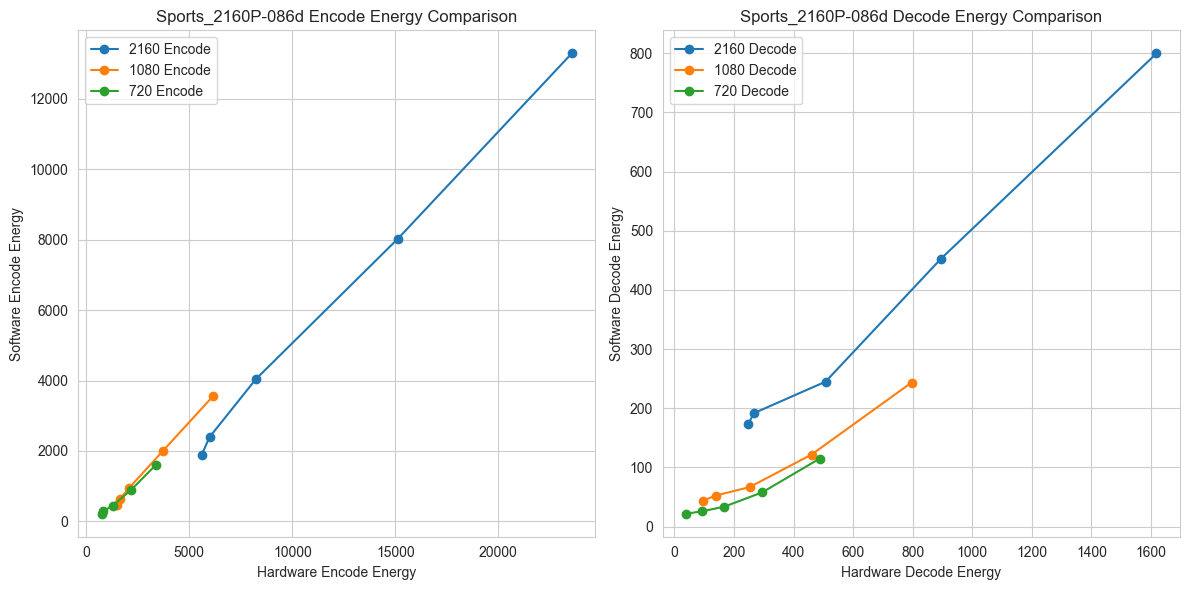

In [12]:
video_names = compare_data['video_name'].unique()

for video_name in video_names:
    subset_data = compare_data[compare_data['video_name'] == video_name]
    resolutions = subset_data['resolution'].unique()

    # subfig
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # encoding comparison
    for resolution in resolutions:
        resolution_data = subset_data[subset_data['resolution'] == resolution]

        target_encode_energy_hardware = resolution_data['target_encode_energy_hardware'].values
        target_encode_energy_software = resolution_data['target_encode_energy_software'].values
        print(f'target_encode_energy_hardware: {target_encode_energy_hardware}')
        print(f'target_encode_energy_software: {target_encode_energy_software}')

        ax1.plot(target_encode_energy_hardware, target_encode_energy_software, label=f'{resolution} Encode', marker='o')

    ax1.set_title(f'{video_name} Encode Energy Comparison')
    ax1.set_xlabel('Hardware Encode Energy')
    ax1.set_ylabel('Software Encode Energy')
    ax1.legend()

    # decoding comparison
    for resolution in resolutions:
        resolution_data = subset_data[subset_data['resolution'] == resolution]

        decode_energy_hardware = resolution_data['decode_energy_hardware'].values
        decode_energy_software = resolution_data['decode_energy_software'].values
        print(f'decode_energy_hardware: {decode_energy_hardware}')
        print(f'decode_energy_software: {decode_energy_software}')

        ax2.plot(decode_energy_hardware, decode_energy_software, label=f'{resolution} Decode', marker='o')

    ax2.set_title(f'{video_name} Decode Energy Comparison')
    ax2.set_xlabel('Hardware Decode Energy')
    ax2.set_ylabel('Software Decode Energy')
    ax2.legend()

    # 显示网格
    ax1.grid(True)
    ax2.grid(True)

    # 调整子图布局
    plt.tight_layout()

    # 显示图表
    plt.show()
